In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

%matplotlib inline

In [3]:
# Set data input folder
# Download files described in README.md to this folder
input_folder = "inputs"

# Set output folder, subfolder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)
if not os.path.exists(os.path.join(output_folder,"figure_panels")):
    os.makedirs(os.path.join(output_folder,"figure_panels"), exist_ok=True)

In [4]:
# Load barcodes used in experiment
#guide_df = pd.read_csv('../common_files/Barcodes.csv')
guide_df = pd.read_csv("../SABER_Library_ngt_Included_Oligo_Sequences_Assiged.csv")
#guide_list = list(saber_library['sgRNA'])
#len(guide_list)
guide_df

,Gene_Symbol,Source,gene_ID,guide_ID,sgRNA,Oligo
0,ABCF1,GO_BP_TRANSLATION,23,23.0_1,GCAACACATCAATGTTGGGA,CTTAAACCGGCCAACATACCCGTCTCgCACCgGCAACACATCAATG...
1,ABCF1,GO_BP_TRANSLATION,23,23.0_2,TGTAATTGCCCCTATAGTAG,CTTAAACCGGCCAACATACCCGTCTCgCACCgTGTAATTGCCCCTA...
2,ABCF1,GO_BP_TRANSLATION,23,23.0_3,GATGGAGTATGAGCGCCAAG,CTTAAACCGGCCAACATACCCGTCTCgCACCgGATGGAGTATGAGC...
3,ABCF1,GO_BP_TRANSLATION,23,23.0_4,GCGGGAGGACATCTCCGCCT,CTTAAACCGGCCAACATACCCGTCTCgCACCgGCGGGAGGACATCT...
4,ADAR,P65_MARKER,103,103.0_1,TTCTTGTAGGGTGAACACCG,CTTAAACCGGCCAACATACCCGTCTCgCACCgTTCTTGTAGGGTGA...
...,...,...,...,...,...,...
2395,nontargeting,nt_601,-1,ntg_scrambled_36,GACACGCCCGCGGTAGGTGC,CTTAAACCGGCCAACATACCCGTCTCgCACCgGACACGCCCGCGGT...
2396,nontargeting,nt_601,-1,ntg_scrambled_37,GGATAACGGGATGACTGCGC,CTTAAACCGGCCAACATACCCGTCTCgCACCgGGATAACGGGATGA...
2397,nontargeting,nt_601,-1,ntg_scrambled_38,GCGTGCGTCCCGGGTTACCC,CTTAAACCGGCCAACATACCCGTCTCgCACCgGCGTGCGTCCCGGG...
2398,nontargeting,nt_601,-1,ntg_scrambled_39,GCGGGGCGGTGACTTTCAAG,CTTAAACCGGCCAACATACCCGTCTCgCACCgGCGGGGCGGTGACT...


In [4]:
# Create list of all Metadata columns by loading header of single file
df = pd.read_csv('20240202_6W_CP498_SABER_Pilot_HeLa_single_cell_profiles_ALLBATCHES___CP_Plate_1___ALLWELLS.csv.gz', nrows=10)
col_list = [x for x in df.columns if 'Metadata' in x]
print (f'There are {len(col_list)} Metadata columns')
df

There are 31 Metadata columns


,Metadata_Foci_Parent_Cells,Metadata_Foci_Cell_Quality_Index,Metadata_Foci_Barcode_MatchedTo_GeneCode,Metadata_Foci_Barcode_MatchedTo_Barcode,Metadata_Foci_Barcode_MatchedTo_Score_mean,Metadata_Foci_Barcode_MatchedTo_Score_count,Metadata_Foci_cell_quality_method,Metadata_Foci_ImageNumber,Metadata_Foci_site,Metadata_Foci_plate,...,Nuclei_Texture_Variance_WGA_10_02_256,Nuclei_Texture_Variance_WGA_10_03_256,Nuclei_Texture_Variance_WGA_20_00_256,Nuclei_Texture_Variance_WGA_20_01_256,Nuclei_Texture_Variance_WGA_20_02_256,Nuclei_Texture_Variance_WGA_20_03_256,Nuclei_Texture_Variance_WGA_5_00_256,Nuclei_Texture_Variance_WGA_5_01_256,Nuclei_Texture_Variance_WGA_5_02_256,Nuclei_Texture_Variance_WGA_5_03_256
0,3,1,WFDC8,TGCACACCCTTCAAATACAG,1,2,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,0.00000,0.0000,0,0,0,0,3.71240,5.54000,7.64440,8.58450
1,4,1,ABCF1,GCGGGAGGACATCTCCGCCT,1,1,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,0.00000,0.0000,0,0,0,0,5.44110,3.58610,3.52550,3.95670
2,9,1,ALG6,CTATGATAAGCTGTAAGAGG,1,1,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,0.00000,0.0000,0,0,0,0,1.10940,1.16260,1.27630,1.21920
3,10,1,RHOB,GGGACAGAAGTGCTTCACCT,1,1,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,1.25000,0.0000,0,0,0,0,0.98522,0.94497,1.02590,1.02970
4,11,1,XPC,AGTTTGAGACATATCTTCGG,1,5,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,0.38776,1.6875,0,0,0,0,1.19530,0.80810,0.95558,1.45500
5,13,1,SIRPD,TGTCACAGACTGTATCAACT,1,1,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,7.39790,12.0320,0,0,0,0,5.33690,6.14770,6.64590,6.83290
6,15,1,TBC1D23,CAGTTGTATAAATCGCTGCG,1,2,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,2.49380,3.5512,0,0,0,0,5.25170,5.60450,5.13240,4.48240
7,16,1,STAM,CTTACCAACATCCTGATCGA,1,3,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,0.43602,0.6250,0,0,0,0,1.47290,1.72340,0.82512,0.81856
8,17,1,LTA4H,AAGTTACAAGGGATCGCCAA,1,4,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,3.42680,4.7072,0,0,0,0,3.27110,3.05330,3.11800,3.15230
9,19,1,PML,AGTGCTTCGAGGCACACCAG,1,3,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,1.86580,2.1816,0,0,0,0,6.73000,8.02360,6.74600,6.51450


In [6]:
# Load and subset the single-cell profiles per plate for M059K plates
plates = ['CP_Plate_1','CP_Plate_2']
chunksize = 10 ** 5

df_plate_list = []
for plate in plates:
    filename = f'20240202_6W_CP498_SABER_Pilot_HeLa_single_cell_profiles_ALLBATCHES___{plate}___ALLWELLS.csv.gz' 
    df = pd.read_csv(filename, nrows=20)
    col_list = list(df)[:31]
    chunks = []
    with pd.read_csv(filename,usecols=col_list ,chunksize=chunksize) as reader:
        for chunk in reader:
            chunks.append(chunk)
            print(chunk.shape,f'of plate {plate}')
    df = pd.concat(chunks)
    df.to_csv(os.path.join(output_folder,f'20240202_6W_CP498_SABER_Pilot_HeLa_single_cell_profiles_ALLBATCHES___{plate}_ALLWELLS.csv.gz'),index = False)
    df_plate_list.append(df)

metadata_df = pd.concat(df_plate_list)
metadata_df.to_csv(os.path.join(output_folder,'CP498_CP_single_cell_metadata.csv.gz'),index = False)


(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_1
(54497, 31) of plate CP_Plate_1
(100000, 31) of plate CP_Plate_2
(100000, 31) of plate CP_Plate_2
(100000, 31) of plate CP_Plate_2
(100000, 31) of plate CP_Plate_2
(100000, 31) of plate CP_Plate_2
(100000, 31) of plate CP_Plate_2
(100000, 31) of plate CP_Plate_2
(100000, 31) of plate CP_Plate_2
(100000, 31) of plate CP_Plate_2
(100000, 31

In [5]:
metadata_df = pd.read_csv(os.path.join(output_folder,'CP498_CP_single_cell_metadata.csv.gz'))
metadata_df

,Metadata_Foci_Parent_Cells,Metadata_Foci_Cell_Quality_Index,Metadata_Foci_Barcode_MatchedTo_GeneCode,Metadata_Foci_Barcode_MatchedTo_Barcode,Metadata_Foci_Barcode_MatchedTo_Score_mean,Metadata_Foci_Barcode_MatchedTo_Score_count,Metadata_Foci_cell_quality_method,Metadata_Foci_ImageNumber,Metadata_Foci_site,Metadata_Foci_plate,...,Metadata_Nuclei_ObjectNumber_x,Metadata_Foci_Cell_Quality,Metadata_Cells_ImageNumber_y,Metadata_Cells_Parent_Nuclei_y,Metadata_Cytoplasm_ImageNumber_y,Metadata_Cytoplasm_ObjectNumber_y,Metadata_Cytoplasm_Parent_Cells_y,Metadata_Cytoplasm_Parent_Nuclei_y,Metadata_Nuclei_ImageNumber_y,Metadata_Nuclei_ObjectNumber_y
0,3,1,WFDC8,TGCACACCCTTCAAATACAG,1.00000,2,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,3,Perfect,161,3,161,3,3,3,161,3
1,4,1,ABCF1,GCGGGAGGACATCTCCGCCT,1.00000,1,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,4,Perfect,161,4,161,4,4,4,161,4
2,9,1,ALG6,CTATGATAAGCTGTAAGAGG,1.00000,1,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,9,Perfect,161,9,161,9,9,9,161,9
3,10,1,RHOB,GGGACAGAAGTGCTTCACCT,1.00000,1,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,10,Perfect,161,10,161,10,10,10,161,10
4,11,1,XPC,AGTTTGAGACATATCTTCGG,1.00000,5,simple,161,CP_Plate_1-Well5-32,CP_Plate_1,...,11,Perfect,161,11,161,11,11,11,161,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991346,4016,1,SYNCRIP,TGAGAAAGCTGGACCTATAT,1.00000,1,simple,349,CP_Plate_2-Well1-61,CP_Plate_2,...,4016,Perfect,349,4016,349,4016,4016,4016,349,4016
3991347,4017,1,CDX4,TCTTGCGCATCCATGCATAG,1.00000,4,simple,349,CP_Plate_2-Well1-61,CP_Plate_2,...,4017,Perfect,349,4017,349,4017,4017,4017,349,4017
3991348,4018,1,MAP1S,CTGTCGCTGAGCCCACTGCG,1.00000,5,simple,349,CP_Plate_2-Well1-61,CP_Plate_2,...,4018,Perfect,349,4018,349,4018,4018,4018,349,4018
3991349,4020,1,COG4,GCTGTATACGAACGGCTCTG,1.00000,1,simple,349,CP_Plate_2-Well1-61,CP_Plate_2,...,4020,Perfect,349,4020,349,4020,4020,4020,349,4020


In [6]:
# Organize the data and calculate cell count per gene and per guide
count_gene_df = metadata_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].value_counts().to_frame().reset_index()
count_gene_df.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_GeneCode",
             "Metadata_Foci_Barcode_MatchedTo_GeneCode": "Cell_Count"},inplace=True)
count_guide_df = metadata_df['Metadata_Foci_Barcode_MatchedTo_Barcode'].value_counts().to_frame().reset_index()
count_guide_df.rename(
    columns={"index": "Metadata_Foci_Barcode_MatchedTo_Barcode", 
             "Metadata_Foci_Barcode_MatchedTo_Barcode": "Cell_Count"},inplace=True)

# Number of unique barcodes and genes
gene_n = len(count_gene_df.Metadata_Foci_Barcode_MatchedTo_GeneCode.unique())
guide_n = len(count_guide_df.Metadata_Foci_Barcode_MatchedTo_Barcode.unique())

print(f'HeLa SABER screen (CP arm) \n {gene_n} Unique genes, {guide_n} Unique guides, {count_gene_df.Cell_Count.sum()} Total cell count')


HeLa SABER screen (CP arm) 
 591 Unique genes, 2400 Unique guides, 3991351 Total cell count


In [7]:
# Concatenate gene and guide cell counts into a single dataframe - calculate number of cells per guide and per gene
df_temp = guide_df[['Gene_Symbol','sgRNA']].rename(columns={"sgRNA":"Metadata_Foci_Barcode_MatchedTo_Barcode"})

count_df = count_guide_df.merge(df_temp,on='Metadata_Foci_Barcode_MatchedTo_Barcode').rename(columns={'Gene_Symbol':'Metadata_Foci_Barcode_MatchedTo_GeneCode'})
count_df = count_df[['Metadata_Foci_Barcode_MatchedTo_GeneCode','Metadata_Foci_Barcode_MatchedTo_Barcode','Cell_Count']]

count_df_no_control = count_df.query('Metadata_Foci_Barcode_MatchedTo_GeneCode != "nontargeting"')
cells_per_gene = count_df_no_control.groupby('Metadata_Foci_Barcode_MatchedTo_GeneCode').sum(numeric_only=True).mean()[0]
cells_per_guide = count_df_no_control.groupby('Metadata_Foci_Barcode_MatchedTo_Barcode').sum(numeric_only=True).mean()[0]

print(f'HeLa SABER screen (CP arm) \n {round(cells_per_gene,2)} cells per gene, {round(cells_per_guide,2)} cells per guide')


HeLa SABER screen (CP arm) 
 6642.88 cells per gene, 1660.72 cells per guide


In [10]:
# Save the cell counts
count_df.to_csv(os.path.join(output_folder,'HeLa_SABER_screen_CP_arm_cell_count.csv.gz'),index = False)

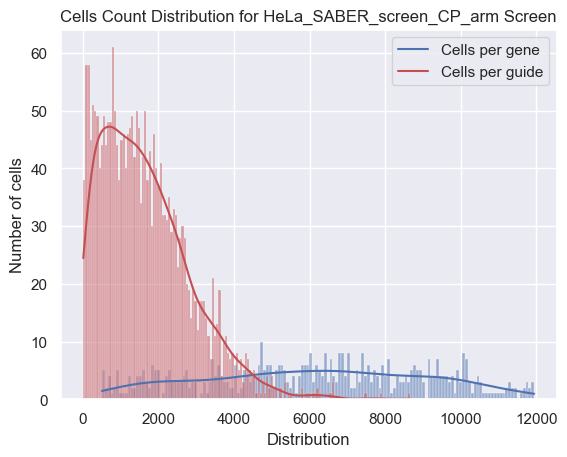

In [14]:
# Plot the results
def plot_distribution(df_count,data_set):
    sns.set_theme()

    fig, ax = plt.subplots()

    counts_1 = df_count.groupby('Metadata_Foci_Barcode_MatchedTo_GeneCode').sum(numeric_only=True)
    counts_1 = counts_1.query('Cell_Count  < 12000')
    counts_1 = counts_1['Cell_Count']
    counts_2 = df_count.groupby('Metadata_Foci_Barcode_MatchedTo_Barcode').sum(numeric_only=True)
    counts_2 = counts_2.query('Cell_Count  < 12000')
    counts_2 = counts_2['Cell_Count']
    
    sns.histplot(counts_1 ,color='b' ,bins= 150, kde=True, alpha=0.5,ax = ax);
    sns.histplot(counts_2 ,color='r' ,bins= 150, kde=True, alpha=0.5,ax = ax);

    ax.set_title(f'Cells Count Distribution for {data_set} Screen')
    ax.set_ylabel('Number of cells')
    ax.set_xlabel('Distribution')

    ax.legend(['Cells per gene','Cells per guide'])

    fig.savefig(os.path.join(output_folder,'figure_panels',f'{data_set}_cells_gene_distribution.png'),
                dpi=300,
                facecolor='w',
                edgecolor='w')
    plt.show()
plot_distribution(count_df_no_control,'HeLa_SABER_screen_CP_arm')